In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
img = cv2.imread('./test_images/Pretty-Maria-Sharapova-4-SW4155.jpg')
img.shape

(1024, 682, 3)

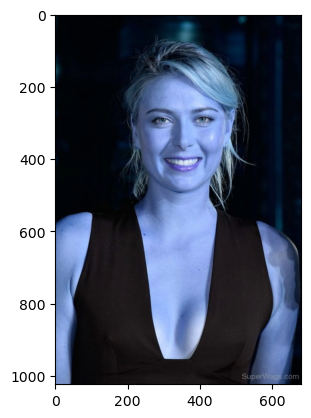

In [15]:
plt.imshow(img)

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 682)

In [18]:
gray

array([[ 26,  26,  25, ...,  11,   9,   9],
       [ 26,  26,  25, ...,  11,  10,  10],
       [ 25,  25,  24, ...,  11,  11,  11],
       ...,
       [157, 157, 157, ...,   3,   3,   3],
       [156, 157, 157, ...,   3,   3,   3],
       [155, 156, 157, ...,   3,   3,   3]], dtype=uint8)

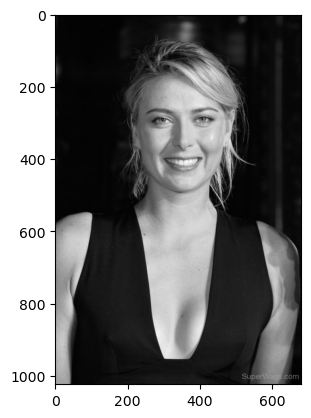

In [19]:
plt.imshow(gray, cmap='gray')

In [21]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[201, 173, 308, 308]])

In [22]:
(x,y,w,h) = faces[0]
x,y,w,h

(201, 173, 308, 308)

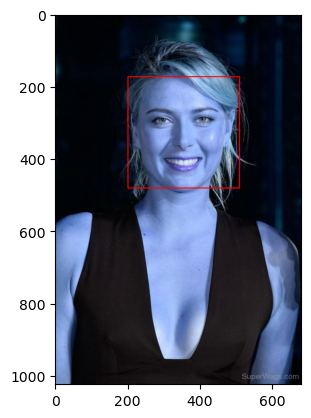

In [23]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

<function matplotlib.pyplot.show(close=None, block=None)>

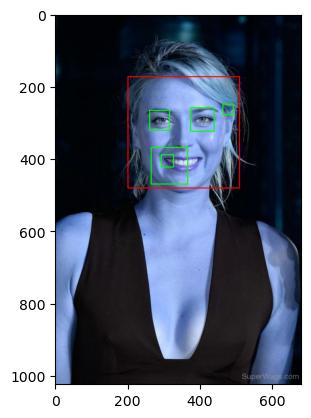

In [27]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w] # roi:region of interest
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure
plt.imshow(face_img, cmap='gray')
plt.show

AttributeError: AxesImage.set() got an unexpected keyword argument 'cmpa'

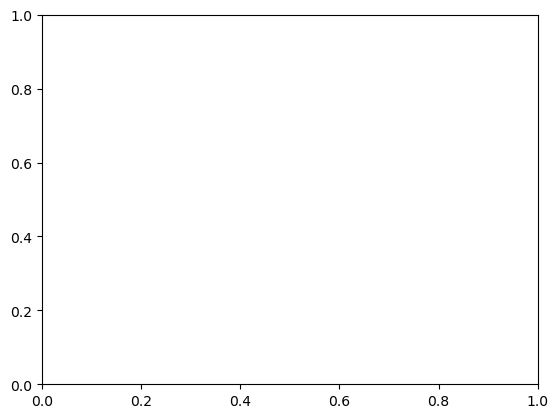

In [25]:
%matplotlib inline
plt.imshow(roi_color, cmpa="gray")

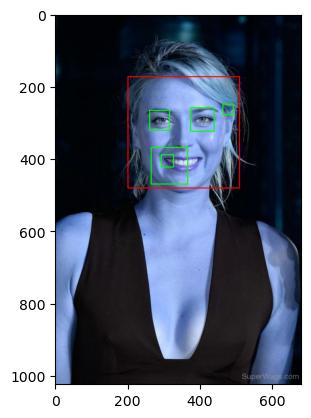

In [26]:
plt.figure()
plt.imshow(face_img, cmap='gray')
# plt.savefig('face_img.png')  # Save the plot as a PNG file
plt.show()